In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Some visual insights

In [2]:
def load_osm_data(file_path):
    with open(file_path, "r") as file:
        osm_data = json.load(file)
    return osm_data
    
def osm_data_to_dataframe(osm_data):
    data_list = []
    for point in osm_data["planet_osm_point"]:
        data_list.append(point)
    return pd.DataFrame(data_list)

def plot_distribution(data, column_name, xlabel):
    plt.figure(figsize=(12, 6))
    sns.countplot(data[column_name])
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

def plot_scatter(data):
    plt.figure(figsize=(12, 6))
    data[[ 'Latitude', 'Longitude']] = data['way'].str.extract(r'POINT \(([-.\d]+) ([-.\d]+)\)').astype(float)
    sns.scatterplot(data=data, x='Longitude', y='Latitude')
    plt.show()

In [3]:
file_paths = ['planet_osm_point_202312122304.json', 'planet_osm_point_202312122304_2.json', 'planet_osm_point_202312122304_3.json']
all_dataframes = []
for file_path in file_paths:
    osm_data = load_osm_data(file_path)
    df = osm_data_to_dataframe(osm_data)
    all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, ignore_index=True)


In [4]:
combined_df

osm_id access addr:housename addr:housenumber addr:interpolation  \
0       7883440301   None           None             None               None   
1       7883440300   None           None             None               None   
2       7883440298   None           None             None               None   
3        814612869   None           None             None               None   
4       7883440299   None           None             None               None   
...            ...    ...            ...              ...                ...   
103135  6481223070   None           None               12               None   
103136  6481223079   None           None                2               None   
103137  6481225705   None           None                3               None   
103138  6481223023   None           None                1               None   
103139  9562685386   None           None             None               None   

       admin_level aerialway aeroway amenity  area  ... tourism tower:type  \
0             None      None    None    None  None  ...    None       None   
1             None      None    None    None  None  ...    None       None   
2             None      None    None    None  None  ...    None       None   
3             None      None    None    None  None  ...    None       None   
4             None      None    None    None  None  ...    None       None   
...            ...       ...     ...     ...   ...  ...     ...        ...   
103135        None      None    None    None  None  ...    None       None   
103136        None      None    None    None  None  ...    None       None   
103137        None      None    None    None  None  ...    None       None   
103138        None      None    None    None  None  ...    None       None   
103139        None      None    None    None  None  ...    None       None   

       tunnel water waterway wetland width  wood z_order  \
0        None  None     None    None  None  None    None   
1        None  None     None    None  None  None    None   
2        None  None     None    None  None  None    None   
3        None  None     None    None  None  None    None   
4        None  None     None    None  None  None    None   
...       ...   ...      ...     ...   ...   ...     ...   
103135   None  None     None    None  None  None    None   
103136   None  None     None    None  None  None    None   
103137   None  None     None    None  None  None    None   
103138   None  None     None    None  None  None    None   
103139   None  None     None    None  None  None    None   

                                 way  
0       POINT (3.4608704 47.9681731)  
1       POINT (3.4583116 47.9678857)  
2       POINT (3.4534487 47.9673272)  
3        POINT (3.455245 47.9668981)  
4       POINT (3.4556991 47.9675768)  
...                              ...  
103135  POINT (2.2537205 47.8412597)  
103136  POINT (2.2527523 47.8401223)  
103137  POINT (2.2521681 47.8405172)  
103138   POINT (2.252342 47.8404217)  
103139  POINT (2.2524787 47.8405023)  

[103140 rows x 69 columns]

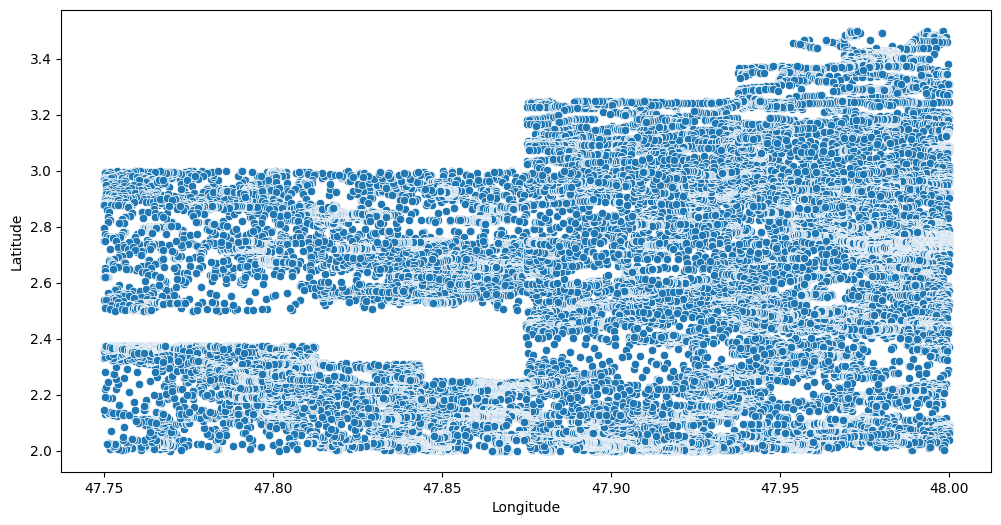

In [5]:
plot_scatter(combined_df)

In [6]:
X = combined_df['Longitude']
Y = combined_df['Latitude']

### Fusion of positions 

In [7]:
import numpy as np

num_cells = 100

min_longitude = np.min(X)
max_longitude = np.max(X)

min_latitude = np.min(Y)
max_latitude = np.max(Y)

delta_longitude = (max_longitude - min_longitude)/num_cells
delta_latitude =  (max_latitude - min_latitude)/num_cells

x_values = np.linspace(min_longitude, max_longitude, num_cells)
y_values = np.linspace(min_latitude, max_latitude, num_cells)

Longitude, Latitude = np.meshgrid(x_values, y_values, indexing='xy')

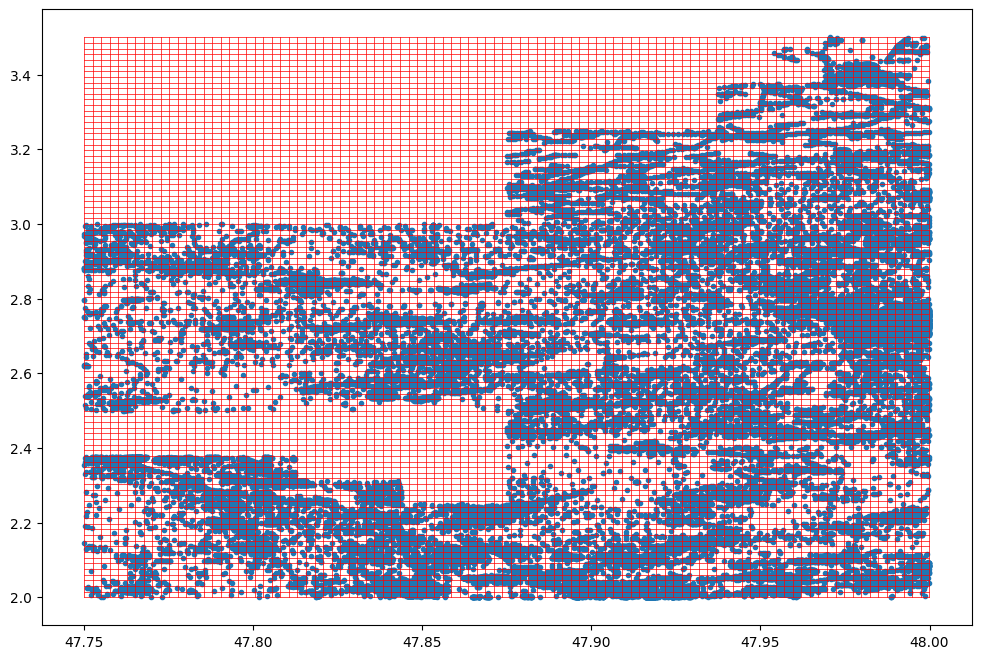

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(X, Y, marker='.')
plt.plot(Longitude.T, Latitude.T, color='red', linestyle = '-', linewidth = 0.5)
plt.plot(Longitude, Latitude, color='red', linestyle = '-', linewidth = 0.5)
plt.show()

In [9]:
regions = {}

for position in combined_df.iterrows():
    longitude_ = position[1].Longitude
    latitude_ = position[1].Latitude
    # break

    i_, j_ = int(((longitude_ - min_longitude)// delta_longitude)), int(((latitude_ - min_latitude)// delta_latitude))
    if (i_, j_) in regions:
        regions[(i_, j_)].append(position)
    else:
        regions[(i_, j_)] = [position]

In [10]:
print(regions.keys())

dict_keys([(87, 97), (86, 96), (86, 97), (85, 97), (82, 97), (83, 97), (81, 97), (82, 96), (83, 96), (84, 95), (87, 96), (87, 95), (88, 96), (93, 96), (90, 97), (87, 98), (89, 98), (88, 98), (88, 99), (88, 100), (89, 99), (91, 99), (92, 99), (96, 98), (95, 97), (96, 99), (97, 98), (97, 99), (98, 99), (99, 99), (99, 98), (98, 98), (99, 97), (98, 97), (98, 96), (97, 97), (96, 97), (95, 96), (94, 95), (96, 95), (97, 95), (98, 95), (98, 94), (93, 93), (93, 94), (95, 95), (93, 95), (92, 95), (92, 94), (91, 95), (91, 94), (90, 94), (90, 95), (88, 95), (88, 94), (89, 94), (87, 94), (88, 93), (89, 93), (90, 93), (91, 93), (92, 93), (93, 92), (92, 92), (91, 92), (90, 92), (88, 92), (87, 93), (89, 92), (87, 92), (87, 91), (88, 91), (89, 91), (90, 91), (91, 91), (92, 91), (93, 91), (94, 91), (94, 92), (95, 91), (96, 91), (96, 92), (95, 92), (94, 93), (95, 93), (96, 93), (97, 92), (97, 93), (99, 92), (98, 90), (97, 90), (97, 91), (96, 90), (97, 89), (98, 89), (99, 90), (99, 89), (97, 88), (98, 87)

In [11]:
sizes_of_regions = [len(values) for key, values in regions.items()]
print("Size of the largest area : ", np.max(sizes_of_regions))
print("Size of the smallest area : ", np.min(sizes_of_regions))
print("Mean of sizes : ", np.mean(sizes_of_regions))
print("Standard deviation of sizes : ", np.std(sizes_of_regions))

Size of the largest area :  991
Size of the smallest area :  1
Mean of sizes :  18.078878177037687
Standard deviation of sizes :  50.24042895899957


In [12]:
for key, value in regions.items():
    # print(type(value[0][1]))
    # break
    dataframes_list = [val[1].to_frame().T for val in value]
    # print(dataframes_list[0])
    # print(dataframes_list[1])
    # break
    result_df = pd.concat(dataframes_list, ignore_index=True)
    regions[key] = result_df

In [13]:
for key, val in regions.items():
    print(val)
    break

       osm_id access addr:housename addr:housenumber addr:interpolation  \
0  7883440301   None           None             None               None   
1  7883440300   None           None             None               None   
2  7883440299   None           None             None               None   

  admin_level aerialway aeroway amenity  area  ... tunnel water waterway  \
0        None      None    None    None  None  ...   None  None     None   
1        None      None    None    None  None  ...   None  None     None   
2        None      None    None    None  None  ...   None  None     None   

  wetland width  wood z_order                           way  Latitude  \
0    None  None  None    None  POINT (3.4608704 47.9681731)   3.46087   
1    None  None  None    None  POINT (3.4583116 47.9678857)  3.458312   
2    None  None  None    None  POINT (3.4556991 47.9675768)  3.455699   

   Longitude  
0  47.968173  
1  47.967886  
2  47.967577  

[3 rows x 71 columns]
       osm_id acce

KeyboardInterrupt: 

### Creation of the Vocabulary

In [ ]:
# combined_df2 = combined_df.copy()

# columns_to_drop = []

# for col in combined_df.columns: 
#     print(col, combined_df[col].isnull().sum()==len(combined_df))
#     if combined_df[col].empty: 
#         columns_to_drop.append(col)       
    

# print(columns_to_drop)
# combined_df.drop(columns=columns_to_drop, inplace=True)

In [14]:
variables = combined_df.columns.tolist()
vocabularies = []

for i in range (1, len(variables)-3):
    values = combined_df[variables[i]].unique()
    values = np.array(values)
    voc = {value: i for i, value in enumerate(values)}
    vocabularies.append(voc)

In [ ]:
print(vocabularies[60]) #Variable entièrement nulle
print(variables[60])

{None: 0}
tower:type


### Vectorization

In [16]:
X_train = []
dim = len(variables)

for key, value in regions.items():
    x = np.zeros(dim)
    for i, variable in enumerate(variables):
        x[i] += value[variable].count()
    X_train.append(x)

In [ ]:
print(X_train)
print(np.array(X_train).shape)